In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('dataset.csv')

In [103]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


**Data Cleaning**

In [104]:
df.duplicated().sum()

np.int64(24)

**Remove Duplicates Rows**

In [105]:
df.duplicated().value_counts()

,count
False,978
True,24


In [106]:
df[df.duplicated(keep=False)].sort_values('description').head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
304,2024 Honda CR-V Hybrid Sport,\n \n !!! CALL US AT (812) 477-620...,Honda,CR-V Hybrid,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
637,2024 Honda CR-V Hybrid Sport,\n \n !!! CALL US AT (812) 477-620...,Honda,CR-V Hybrid,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
398,2024 Mazda CX-90 PHEV Premium Plus,"\n \n At Walser, youll get an exce...",Mazda,CX-90 PHEV,2024,58399.0,DOHC 16V LEV3-SULEV30,4.0,PHEV Hybrid Fuel,4.0,Automatic,Premium Plus,SUV,4.0,Rhodium White Premium,Black,All-wheel Drive
206,2024 Mazda CX-90 PHEV Premium Plus,"\n \n At Walser, youll get an exce...",Mazda,CX-90 PHEV,2024,58399.0,DOHC 16V LEV3-SULEV30,4.0,PHEV Hybrid Fuel,4.0,Automatic,Premium Plus,SUV,4.0,Rhodium White Premium,Black,All-wheel Drive
158,2023 Dodge Charger SXT,\n \n F8 Green exterior and Black ...,Dodge,Charger,2023,37490.0,24V MPFI DOHC,6.0,Gasoline,20.0,8-Speed Automatic,SXT,Sedan,4.0,Green,Black,Rear-wheel Drive


**Trim the duplicate Rows**

In [107]:
df = df.drop('description',axis = 1)

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
df.duplicated().value_counts()

,count
False,971


**Detection of Missing Values**

In [110]:
df.isnull().sum()

,0
name,0
make,0
model,0
year,0
price,23
engine,2
cylinders,103
fuel,7
mileage,32
transmission,2


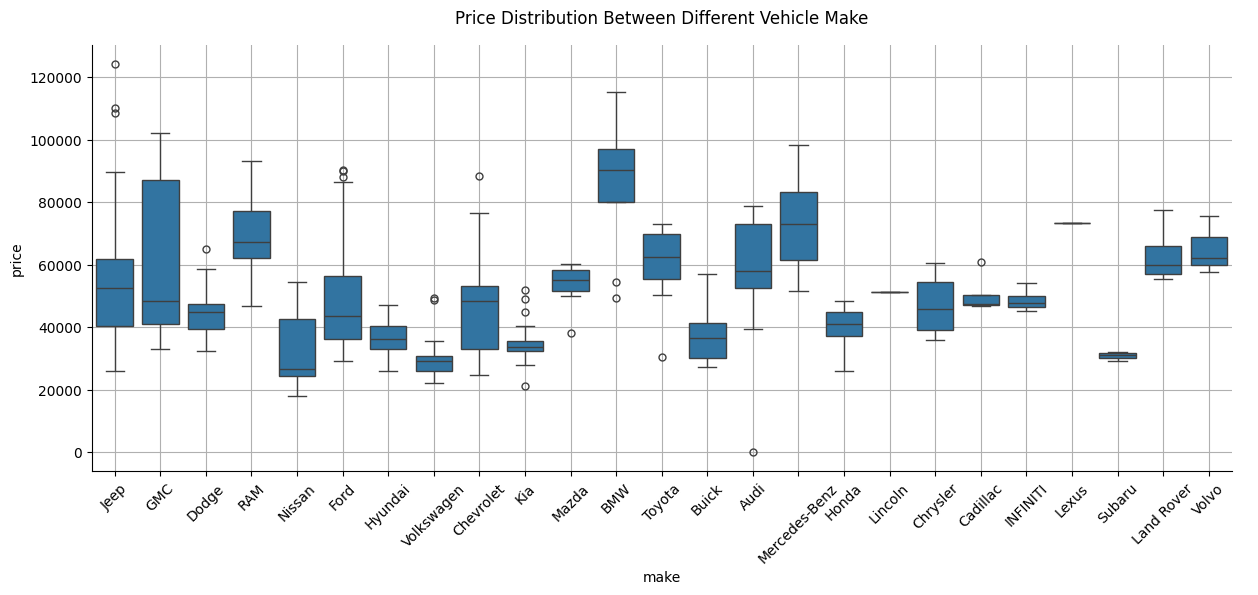

In [111]:
sns.catplot(
    x='make', y='price',
    data=df.dropna(), kind='box',
    aspect=5/2
)
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Price Distribution Between Different Vehicle Make', y=1.03)
plt.show()

In [112]:
median_vals = df.groupby(['make', 'model'])['price'].median().reset_index()
print(median_vals[median_vals['price'].isna()])

median_vals

              make    model  price
9              BMW      530    NaN
118  Mercedes-Benz  GLE 350    NaN


,make,model,price
0,Acura,MDX,56155.0
1,Acura,ZDX,69850.0
2,Audi,A3,39375.0
3,Audi,A5 Sportback,56105.0
4,Audi,Q5 e,73190.0
...,...,...,...
148,Volkswagen,Jetta,25923.0
149,Volkswagen,Taos,29226.0
150,Volvo,C40 Recharge Pure Electric,62240.0
151,Volvo,S60 Recharge Plug-In Hybrid,57545.0


In [113]:
dropping_rows = df[df['model'].isin(['530', 'GLE 350'])]
df.drop(dropping_rows.index, axis=0, inplace=True)

In [114]:
def impute_price(row):
    if pd.isnull(row['price']):
        median_val = median_vals.loc[median_vals['model'] == row['model'], 'price']
        return float(median_val.values[0]) if not median_val.empty else np.nan
    return row['price']

df['price'] = df.apply(impute_price, axis=1)


In [115]:
df.isnull().sum()

,0
name,0
make,0
model,0
year,0
price,0
engine,2
cylinders,103
fuel,7
mileage,32
transmission,2


In [116]:
df.head(5)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [117]:
df['price'].isna().sum()

np.int64(0)

engine	2 Missing Values

In [118]:
df[df['engine'].isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
803,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive


In [119]:
df[df['model'] == 'CR-V Hybrid']

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
109,2024 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2024,42005.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport Touring,SUV,4.0,Radiant Red Metallic,Black,All-wheel Drive
304,2024 Honda CR-V Hybrid Sport,Honda,CR-V Hybrid,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
534,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,2024,40355.0,16V GDI DOHC Hybrid,4.0,Hybrid,68.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,Black,All-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
673,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive


In [120]:
df[df['model'] == 'Wagoneer']

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
6,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive
73,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63057.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Metallic,Black,Four-wheel Drive
92,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,60555.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Rear-wheel Drive
234,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,65928.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
250,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,87488.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,22.0,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Global Black,Four-wheel Drive
261,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,72908.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Diamond Black,Black,Four-wheel Drive
399,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,75888.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Black,Four-wheel Drive
650,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,84935.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,1.0,8-Speed Automatic,Series II,SUV,4.0,Velvet Red Pearlcoat,Global Black,Four-wheel Drive
686,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,77473.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,14.0,8-Speed Automatic,Base,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive


In [121]:
df.sort_values(['model', 'engine'], ascending=False, inplace=True)
df['engine'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-121-2867781627.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-121-2867781627.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['engine'].fillna(method='ffill', inplace=True)


In [122]:
print(f"Total Missing Values in 'engine' column: {df['engine'].isna().sum()}")
print(df[df['model'] == 'CR-V Hybrid'][['model', 'engine']])
print(df[df['model'] == 'Wagoneer'][['model', 'engine']])

Total Missing Values in 'engine' column: 0
           model               engine
109  CR-V Hybrid  16V GDI DOHC Hybrid
304  CR-V Hybrid  16V GDI DOHC Hybrid
534  CR-V Hybrid  16V GDI DOHC Hybrid
673  CR-V Hybrid  16V GDI DOHC Hybrid
614  CR-V Hybrid  16V GDI DOHC Hybrid
        model                              engine
837  Wagoneer  rbo Regular Unleaded I-6 3.0 L/183
0    Wagoneer             24V GDI DOHC Twin Turbo
6    Wagoneer             24V GDI DOHC Twin Turbo
73   Wagoneer             24V GDI DOHC Twin Turbo
92   Wagoneer             24V GDI DOHC Twin Turbo
234  Wagoneer             24V GDI DOHC Twin Turbo
250  Wagoneer             24V GDI DOHC Twin Turbo
261  Wagoneer             24V GDI DOHC Twin Turbo
399  Wagoneer             24V GDI DOHC Twin Turbo
650  Wagoneer             24V GDI DOHC Twin Turbo
686  Wagoneer             24V GDI DOHC Twin Turbo
751  Wagoneer             24V GDI DOHC Twin Turbo
772  Wagoneer             24V GDI DOHC Twin Turbo
970  Wagoneer             24V

cylinders variable - Missing Values
103 missing values

In [123]:
df[df['cylinders'].isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
293,2024 BMW i7 eDrive50,BMW,i7,2024,110445.0,c,NaN,Electric,5.0,1-Speed Automatic,eDrive50,Sedan,4.0,Black Sapphire Metallic,Black,Rear-wheel Drive
884,2024 BMW i7 M70,BMW,i7,2024,195895.0,c,NaN,Electric,0.0,1-Speed Automatic,M70,Sedan,4.0,Gray Metallic,Caramel,All-wheel Drive
227,2024 BMW i5 M60,BMW,i5,2024,91825.0,c,NaN,Electric,7.0,1-Speed Automatic,M60,Sedan,4.0,Mineral White,Black,All-wheel Drive
419,2024 BMW i5 M60,BMW,i5,2024,96895.0,c,NaN,Electric,37.0,1-Speed Automatic,M60,Sedan,4.0,Black Sapphire,Black,All-wheel Drive
424,2024 BMW i5 M60,BMW,i5,2024,93335.0,c,NaN,Electric,3.0,1-Speed Automatic,M60,Sedan,4.0,Black Sapphire,Black,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2024 Mercedes-Benz EQE 350+ Base,Mercedes-Benz,EQE 350+,2024,79765.0,c,NaN,Electric,9.0,1-Speed Automatic,Base,Sedan,4.0,Twilight Blue Metallic,Gray,Rear-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive
14,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
28,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive


In [124]:
df[(df['cylinders'].isna()) & (df['fuel'] != 'Electric')]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
128,2024 Subaru Solterra Premium,Subaru,Solterra,2024,39934.0,c,NaN,NaN,5.0,1-Speed Automatic,Premium,SUV,4.0,Galactic,Black,All-wheel Drive
219,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive
315,2024 Honda Prologue TOURING,Honda,Prologue,2024,56550.0,c,NaN,NaN,1.0,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
489,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Pearl,Black,All-wheel Drive
490,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
726,2024 Jaguar I-PACE EV400 R-Dynamic HSE,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,NaN,NaN,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive


In [125]:
df[df['model'].isin([
    'Solterra', 'Prologue', 'I-PACE', 'Equinox EV', 'CR-V'
])][['make', 'model', 'cylinders', 'fuel']].sort_values('make')

,make,model,cylinders,fuel
610,Chevrolet,Equinox EV,NaN,NaN
219,Honda,Prologue,NaN,NaN
315,Honda,Prologue,NaN,NaN
489,Honda,Prologue,NaN,NaN
490,Honda,Prologue,NaN,NaN
257,Honda,CR-V,4.0,Hybrid
893,Honda,CR-V,NaN,Gasoline
950,Honda,CR-V,4.0,Gasoline
726,Jaguar,I-PACE,NaN,NaN
128,Subaru,Solterra,NaN,NaN


In [126]:
df.loc[893, 'cylinders'] = 4.0

rows = [
    128, 219, 315, 489, 490, 610, 726
]
for i in rows:
    df.loc[i, 'cylinders'] = 0.0
    df.loc[i, 'fuel'] = 'Electric'

df[df['model'].isin([
    'Solterra', 'Prologue', 'I-PACE', 'Equinox EV', 'CR-V'
])][['make', 'model', 'cylinders', 'fuel']].sort_values('make')

,make,model,cylinders,fuel
610,Chevrolet,Equinox EV,0.0,Electric
219,Honda,Prologue,0.0,Electric
315,Honda,Prologue,0.0,Electric
489,Honda,Prologue,0.0,Electric
490,Honda,Prologue,0.0,Electric
257,Honda,CR-V,4.0,Hybrid
893,Honda,CR-V,4.0,Gasoline
950,Honda,CR-V,4.0,Gasoline
726,Jaguar,I-PACE,0.0,Electric
128,Subaru,Solterra,0.0,Electric


In [127]:
df['cylinders'].fillna(0.0, inplace=True)

/tmp/ipython-input-127-3549803175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(0.0, inplace=True)


In [128]:
df.isnull().sum()

,0
name,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,32
transmission,2


mileage variable - 32 Missing Values

In [129]:
print(df['mileage'].describe())

count     937.000000
mean       70.919957
std       515.657353
min         0.000000
25%         4.000000
50%         8.000000
75%        13.000000
max      9711.000000
Name: mileage, dtype: float64


In [130]:
df[df['mileage'].isna()].head(5)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
217,2024 Jeep Wrangler 4xe Sport,Jeep,Wrangler 4xe,2024,50755.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,8-Speed Automatic,Sport,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
594,2024 Jeep Wrangler 4xe Sport,Jeep,Wrangler 4xe,2024,51350.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,8-Speed Automatic,Sport,SUV,4.0,Anvil Clearcoat,Black,Four-wheel Drive
596,2023 Jeep Wrangler 4xe Sahara,Jeep,Wrangler 4xe,2023,63715.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,8-Speed Automatic,Sahara,SUV,4.0,Silver Zynith Clearcoat,Black,Four-wheel Drive
607,2024 Jeep Wagoneer L Series II,Jeep,Wagoneer L,2024,83845.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
73,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63057.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Metallic,Black,Four-wheel Drive


In [131]:
df['mileage'].fillna(8.0, inplace=True)
df.isnull().sum()

/tmp/ipython-input-131-2098179092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(8.0, inplace=True)


,0
name,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0
transmission,2


transmission variable- 2 missing values

In [132]:
df[df['transmission'].isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
725,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,111245.0,c,0.0,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive


In [133]:
df[df['model'].isin(['Transit-350', 'EQS 450'])]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
897,2024 Ford Transit-350 Base,Ford,Transit-350,2024,74391.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,85.0,Automatic,Base,Cargo Van,3.0,Oxford White,gray,All-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
793,2023 Ford Transit-350 Base,Ford,Transit-350,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,2023 Ford Transit-350,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive
142,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,112702.5,c,0.0,Electric,8.0,Automatic,Base 4MATIC,Sedan,4.0,Graphite Gray Metallic,Gray,All-wheel Drive
146,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,109545.0,c,0.0,Electric,10.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,Black,Black,All-wheel Drive
253,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,110395.0,c,0.0,Electric,5.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
328,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,112702.5,c,0.0,Electric,10.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
372,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,112702.5,c,0.0,Electric,4.0,Automatic,Base 4MATIC,Sedan,4.0,Polar White,Macchiato Beige,All-wheel Drive
373,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,114850.0,c,0.0,Electric,8.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,NaN,Black,All-wheel Drive


In [134]:
df['transmission'].fillna('Automatic', inplace=True)

/tmp/ipython-input-134-2685511285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transmission'].fillna('Automatic', inplace=True)


In [135]:
df.isna().sum()

,0
name,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0
transmission,0


trim - 1 missing values

In [136]:
df[df['trim'].isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
805,2023 Ford Transit-350,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [137]:
df[df['model'].isin(['Transit-350'])]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
897,2024 Ford Transit-350 Base,Ford,Transit-350,2024,74391.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,85.0,Automatic,Base,Cargo Van,3.0,Oxford White,gray,All-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,Automatic,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
793,2023 Ford Transit-350 Base,Ford,Transit-350,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,2023 Ford Transit-350,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [138]:
df['trim'].fillna('Base', inplace=True)

/tmp/ipython-input-138-3375867240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trim'].fillna('Base', inplace=True)


body - 3 missing values

In [139]:
df[df['body'].isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
687,2024 INFINITI QX50 SPORT,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive
164,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive


In [140]:
df[df['model'].isin(['QX50','Hornet'])]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
167,2024 INFINITI QX50 LUXE,INFINITI,QX50,2024,48350.0,"o 2L I-4 port/direct injection, DOHC, variable...",4.0,Gasoline,3.0,Variable,LUXE,SUV,4.0,Slate Gray,Pebble Gray,Front-wheel Drive
335,2024 INFINITI QX50 LUXE,INFINITI,QX50,2024,45055.0,"o 2L I-4 port/direct injection, DOHC, variable...",4.0,Gasoline,25.0,Variable,LUXE,SUV,4.0,Black Obsidian,Pebble Gray,Front-wheel Drive
799,2024 INFINITI QX50 LUXE,INFINITI,QX50,2024,46855.0,"o 2L I-4 port/direct injection, DOHC, variable...",4.0,Gasoline,11.0,Variable,LUXE,SUV,4.0,Radiant White,Pebble Gray,Front-wheel Drive
687,2024 INFINITI QX50 SPORT,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive
290,2024 Dodge Hornet GT,Dodge,Hornet,2024,36480.0,oled Turbo Premium Unleaded I-4 2.0 L/122,4.0,Gasoline,23.0,Automatic,GT,SUV,4.0,Gray Cray,Black,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2024 Dodge Hornet GT Plus,Dodge,Hornet,2024,42436.0,16V GDI DOHC Turbo,4.0,Gasoline,18.0,9-Speed Automatic,GT Plus,SUV,4.0,Gray,Black,All-wheel Drive
821,2024 Dodge Hornet GT,Dodge,Hornet,2024,36810.0,16V GDI DOHC Turbo,4.0,Gasoline,15.0,9-Speed Automatic,GT,SUV,4.0,Gray,Black,All-wheel Drive
834,2024 Dodge Hornet GT,Dodge,Hornet,2024,36195.0,16V GDI DOHC Turbo,4.0,Gasoline,5.0,9-Speed Automatic,GT,SUV,4.0,Blue Steel,Black,All-wheel Drive
853,2024 Dodge Hornet GT,Dodge,Hornet,2024,39555.0,16V GDI DOHC Turbo,4.0,Gasoline,1.0,9-Speed Automatic,GT,SUV,4.0,HOT TAMALE,NaN,All-wheel Drive


In [141]:
df['body'].fillna('SUV', inplace=True)

/tmp/ipython-input-141-136789004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body'].fillna('SUV', inplace=True)


doors	7 Missing Values

In [142]:
df[df['doors'].isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
857,2025 Chevrolet Trax ACTIV,Chevrolet,Trax,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive
124,2024 Hyundai Santa Fe Calligraphy,Hyundai,Santa Fe,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,Hyundai,Santa Fe,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,Hyundai,Santa Fe,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,0.0,Electric,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,16V GDI DOHC Hybrid,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,4.0,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive


In [143]:
df[df['model'].isin(['Trax','Santa Fe','Equinox EV','CR-V Hybrid','CR-V'])]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
857,2025 Chevrolet Trax ACTIV,Chevrolet,Trax,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive
418,2024 Chevrolet Trax LT,Chevrolet,Trax,2024,24680.0,12V GDI DOHC Turbo,3.0,Gasoline,5.0,6-Speed Automatic,LT,SUV,4.0,Cayenne Orange Metallic,Jet Black,Front-wheel Drive
124,2024 Hyundai Santa Fe Calligraphy,Hyundai,Santa Fe,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,Hyundai,Santa Fe,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,Hyundai,Santa Fe,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,0.0,Electric,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
109,2024 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2024,42005.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport Touring,SUV,4.0,Radiant Red Metallic,Black,All-wheel Drive
304,2024 Honda CR-V Hybrid Sport,Honda,CR-V Hybrid,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
534,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,2024,40355.0,16V GDI DOHC Hybrid,4.0,Hybrid,68.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,Black,All-wheel Drive
673,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive


In [144]:
df['doors'].fillna(4.0, inplace=True)

/tmp/ipython-input-144-36350585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['doors'].fillna(4.0, inplace=True)


exterior_color	5 Missing values

In [145]:
df[df['exterior_color'].isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
137,2024 Acura ZDX A-SPEC,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
117,2024 Jeep Wrangler 4-Door Sahara 4x4,Jeep,Wrangler,2024,59456.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,15.0,Automatic,4-Door Sahara 4x4,SUV,4.0,NaN,Black,Four-wheel Drive
608,2023 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,2023,58665.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,0.0,Automatic,High Roof,Cargo Van,3.0,NaN,NaN,Rear-wheel Drive
612,2024 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,2024,65129.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,0.0,Automatic,High Roof,Pickup Truck,3.0,NaN,NaN,Rear-wheel Drive
373,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,114850.0,c,0.0,Electric,8.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,NaN,Black,All-wheel Drive


In [146]:
df[df['model'].isin(['ZDX','Wrangler','Sprinter 2500','EQS 450'])]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
137,2024 Acura ZDX A-SPEC,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
41,2024 Jeep Wrangler Sport S,Jeep,Wrangler,2024,46973.0,"gasoline direct injection, DOHC, intercooled t...",4.0,Gasoline,10.0,Automatic,Sport S,SUV,4.0,Hydro Blue Pearlcoat,Black,Four-wheel Drive
117,2024 Jeep Wrangler 4-Door Sahara 4x4,Jeep,Wrangler,2024,59456.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,15.0,Automatic,4-Door Sahara 4x4,SUV,4.0,NaN,Black,Four-wheel Drive
162,2024 Jeep Wrangler Rubicon,Jeep,Wrangler,2024,60972.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,12.0,Automatic,Rubicon,SUV,4.0,Granite Crystal Metallic Clearcoat,Black,Four-wheel Drive
266,2024 Jeep Wrangler Rubicon,Jeep,Wrangler,2024,59542.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,10.0,Automatic,Rubicon,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
356,2024 Jeep Wrangler Rubicon,Jeep,Wrangler,2024,67510.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,10.0,Automatic,Rubicon,SUV,4.0,Anvil Clear Coat,Black,Four-wheel Drive
523,2024 Jeep Wrangler Sport S,Jeep,Wrangler,2024,48612.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,10.0,Automatic,Sport S,SUV,4.0,Black Clearcoat,Black,Four-wheel Drive
608,2023 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,2023,58665.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,0.0,Automatic,High Roof,Cargo Van,3.0,NaN,NaN,Rear-wheel Drive
612,2024 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,2024,65129.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,0.0,Automatic,High Roof,Pickup Truck,3.0,NaN,NaN,Rear-wheel Drive
741,2024 Mercedes-Benz Sprinter 2500 Crew 144 WB,Mercedes-Benz,Sprinter 2500,2024,66902.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,10.0,Automatic,Crew 144 WB,Cargo Van,3.0,Gray,NaN,Rear-wheel Drive


In [147]:
df['exterior_color'].value_counts()

,count
exterior_color,
Bright White Clearcoat,80
Black,29
White,28
Gray,27
Diamond Black,24
...,...
Artisan Red Metallic,1
41w,1
Delmonico Red Pearlcoat,1


In [148]:
df['exterior_color'].fillna('Bright White Clearcoat',inplace = True)

/tmp/ipython-input-148-2605382610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exterior_color'].fillna('Bright White Clearcoat',inplace = True)


interior_color	38 Missing values

In [149]:
df[df['interior_color'].isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
137,2024 Acura ZDX A-SPEC,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,Bright White Clearcoat,NaN,All-wheel Drive
446,2024 GMC Yukon XL SLT,GMC,Yukon XL,2024,76648.0,"5.3L V-8 gasoline direct injection, variable v...",8.0,Gasoline,3.0,Automatic,SLT,SUV,4.0,WHITE,NaN,Rear-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,Automatic,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
790,2024 Volkswagen Taos 1.5T SE,Volkswagen,Taos,2024,32751.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,51.0,7-Speed DSG Automatic with Tiptronic,1.5T SE,SUV,4.0,Deep Black Pearl,NaN,All-wheel Drive
608,2023 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,2023,58665.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,0.0,Automatic,High Roof,Cargo Van,3.0,Bright White Clearcoat,NaN,Rear-wheel Drive
612,2024 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,2024,65129.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,0.0,Automatic,High Roof,Pickup Truck,3.0,Bright White Clearcoat,NaN,Rear-wheel Drive
741,2024 Mercedes-Benz Sprinter 2500 Crew 144 WB,Mercedes-Benz,Sprinter 2500,2024,66902.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,10.0,Automatic,Crew 144 WB,Cargo Van,3.0,Gray,NaN,Rear-wheel Drive
819,2024 Kia Sportage X-Line,Kia,Sportage,2024,35435.0,16V PDI DOHC,4.0,Gasoline,16.0,8-Speed Automatic,X-Line,SUV,4.0,Gravity Gray,NaN,All-wheel Drive
967,2024 Kia Sportage X-Line,Kia,Sportage,2024,35795.0,16V PDI DOHC,4.0,Gasoline,41.0,8-Speed Automatic,X-Line,SUV,4.0,Wolf Gray,NaN,All-wheel Drive
971,2024 Kia Sportage X-Line,Kia,Sportage,2024,35400.0,16V PDI DOHC,4.0,Gasoline,141.0,8-Speed Automatic,X-Line,SUV,4.0,Jungle Green,NaN,All-wheel Drive


In [150]:
df[df['model'].isin(['ZDX','Yukon XL','Transit-350','Taos','Sprinter 2500','Sportage','Sorento Hybrid','Seltos','Savana 2500','Mustang Mach-E','Maverick','MDX','Hornet','Grand Cherokee L','GLA 250','Compass','CR-V Hybrid','Atlas Cross Sport'])]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
137,2024 Acura ZDX A-SPEC,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,Bright White Clearcoat,NaN,All-wheel Drive
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
446,2024 GMC Yukon XL SLT,GMC,Yukon XL,2024,76648.0,"5.3L V-8 gasoline direct injection, variable v...",8.0,Gasoline,3.0,Automatic,SLT,SUV,4.0,WHITE,NaN,Rear-wheel Drive
897,2024 Ford Transit-350 Base,Ford,Transit-350,2024,74391.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,85.0,Automatic,Base,Cargo Van,3.0,Oxford White,gray,All-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,Automatic,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,2024,40355.0,16V GDI DOHC Hybrid,4.0,Hybrid,68.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,Black,All-wheel Drive
673,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,16V GDI DOHC Hybrid,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,4.0,Canyon,Black,All-wheel Drive
48,2024 Volkswagen Atlas Cross Sport 2.0T SEL,Volkswagen,Atlas Cross Sport,2024,51721.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,11.0,8-speed automatic,2.0T SEL,SUV,4.0,Silver Mist Metallic,NaN,All-wheel Drive


In [151]:
df['interior_color'].value_counts()

,count
interior_color,
Black,489
Global Black,82
Gray,76
Jet Black,43
Ebony,42
...,...
Navy Pier,1
Mauro Brown,1
Medium Sandstone,1


In [152]:
df['interior_color'].fillna('Black',inplace = True)

/tmp/ipython-input-152-4228466801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['interior_color'].fillna('Black',inplace = True)


In [153]:
df.isna().sum()

,0
name,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0
transmission,0


In [154]:
print(f'Data Sparsity: {df.isna().sum().sum() / (df.shape[0] * df.shape[1])}')

Data Sparsity: 0.0


Detection Of Outliers

In [155]:
def outlier_counter(df, col):
    lower_quart = np.quantile(df[col], 0.25)
    upper_quart = np.quantile(df[col], 0.75)
    iqr = upper_quart - lower_quart
    lower_threshold = lower_quart - 1.5 * iqr
    upper_threshold = upper_quart + 1.5 * iqr
    outliers = df[(df[col] < lower_threshold) | (df[col] > upper_threshold)]
    return(f'---------- \n Total outliers from {col}: {outliers.shape[0]} \n Percentage of data: {(outliers.shape[0]/df.shape[0])*100}% \n')

def quantitative_visualizer(df, variable):

    median = np.median(df[variable])
    mean = np.mean(df[variable])

    fig, ax = plt.subplots(figsize=(10, 3))

    ax.hist(df[variable], bins=10)
    ax.set_xlabel(outlier_counter(df, variable))

    ax2 = ax.twinx()
    ax2.boxplot(df[variable], vert=False)
    ax2.annotate(f'Median: {median}', xy=(median, 1.10))
    ax2.annotate(f'  Mean: {mean}', xy=(mean, 0.75), color='darkgreen')
    ax2.axvline(x=mean, color='darkgreen', linestyle='--', alpha=0.5)

    ax.set_title(f'Outlier Detection on {variable} Column')
    plt.show()

def outlier_rows(df, col, threshold='all'):
    lower_quart = np.quantile(df[col], 0.25)
    upper_quart = np.quantile(df[col], 0.75)
    iqr = upper_quart - lower_quart
    lower_threshold = lower_quart - 1.5 * iqr
    upper_threshold = upper_quart + 1.5 * iqr

    if threshold == 'all':
        outliers = df[(df[col] < lower_threshold) | (df[col] > upper_threshold)]
    elif threshold == 'lower':
        outliers = df[df[col] < lower_threshold]
    elif threshold == 'upper':
        outliers = df[df[col] > upper_threshold]

    return outliers

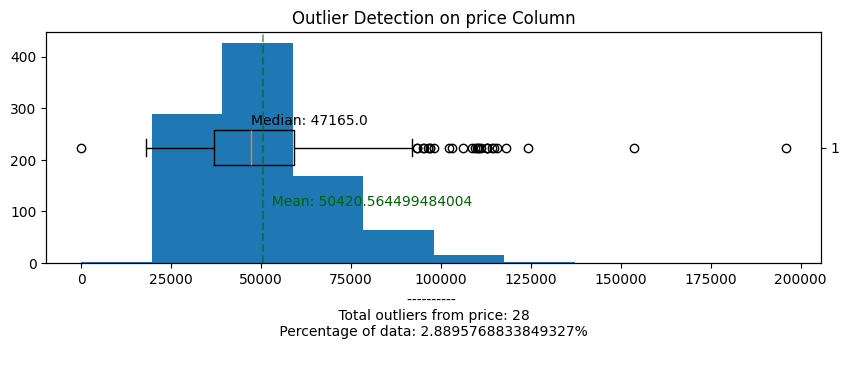

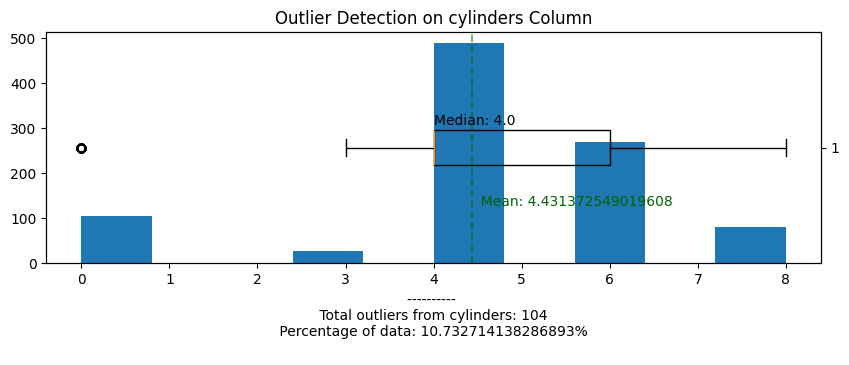

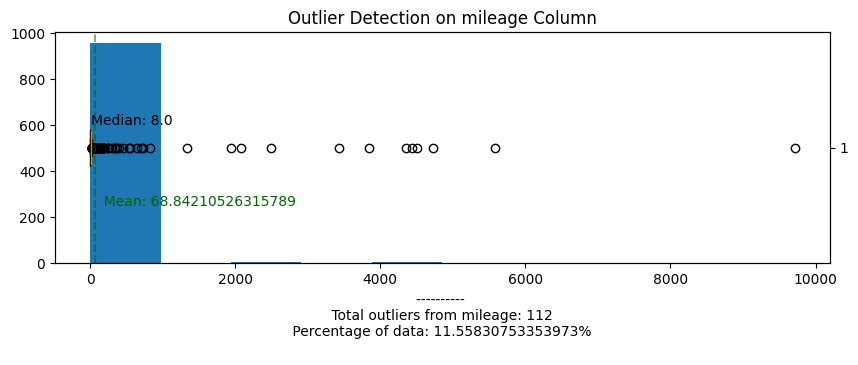

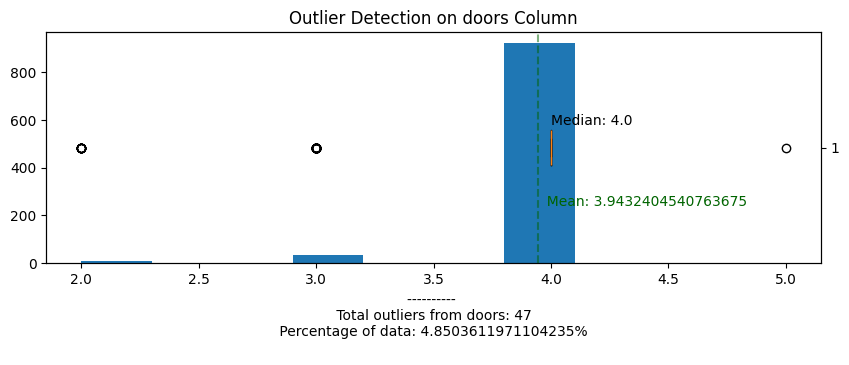

In [156]:
cols = [
    'price', 'cylinders', 'mileage', 'doors'
]

for var in cols:
    quantitative_visualizer(df, var)

Outliers are found in all 4 quantitative variables:


*   price variable: 28 outliers
*   cylinders variable: 104 outliers
*   mileage variable: 112 outliers
*   doors variable: 47 outliers

**Treatment of Outliers**

price Variable - Outliers

## Outlier counts per vehicle model: 
model
EQS 450           9
Grand Wagoneer    3
X7                2
GLS 450           2
i7                2
i5                2
Sierra 2500       1
Sierra 3500       1
Yukon XL          1
SQ8 e-tron        1
RS e-tron GT      1
SQ5               1
740               1
3500              1
Name: count, dtype: int64


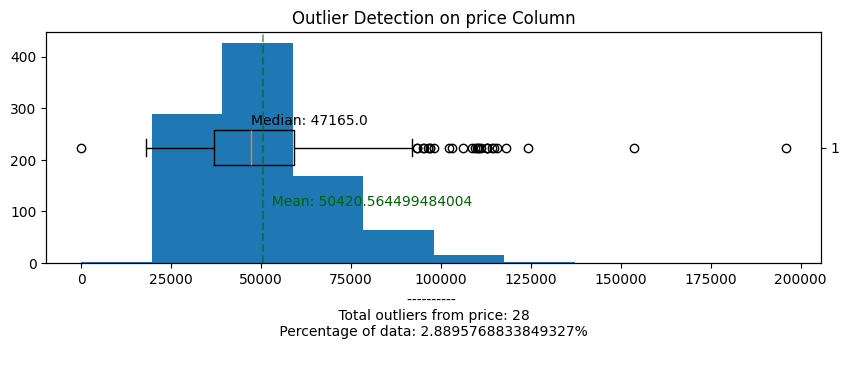

In [157]:
outlier_df = outlier_rows(df, 'price')
print(f"## Outlier counts per vehicle model: \n{outlier_df['model'].value_counts()}")
quantitative_visualizer(df, 'price')

In [158]:
lower_outlier = outlier_rows(df, 'price', threshold='lower')
df.loc[lower_outlier.index, 'price'] = np.median(df['price'])
df.loc[lower_outlier.index, :]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
94,2024 Audi SQ5 Premium Plus,Audi,SQ5,2024,47165.0,oled Turbo Premium Unleaded V-6 3.0 L/183,6.0,Gasoline,14.0,Automatic,Premium Plus,SUV,4.0,Ultra Blue Metallic,Black,All-wheel Drive


## Outlier counts per vehicle model (Price Log-transformed): 
model
i7                1
Versa             1
RS e-tron GT      1
Grand Wagoneer    1
Name: count, dtype: int64


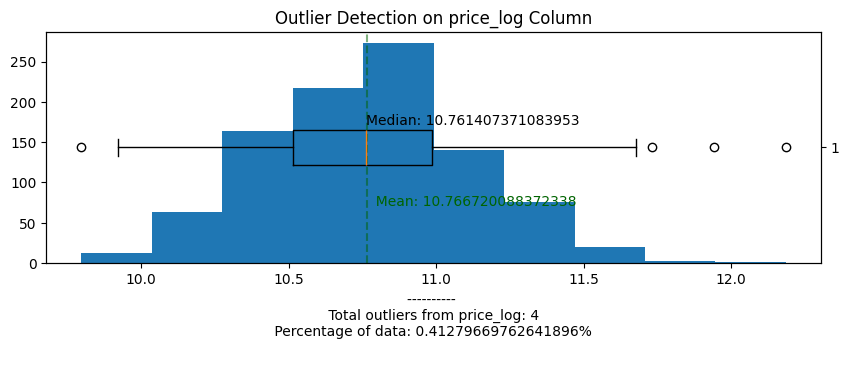

In [159]:
df['price_log'] = np.log(df['price'])

outlier_df = outlier_rows(df, 'price_log')
print(f"## Outlier counts per vehicle model (Price Log-transformed): \n{outlier_df['model'].value_counts()}")
quantitative_visualizer(df, 'price_log')

cylinders Variable - Outliers

## Outlier counts per vehicle model: 
model
IONIQ 5                       26
Mustang Mach-E                15
EQS 450                        9
IONIQ 6                        7
EV6                            7
Q8 e-tron                      5
LYRIQ                          5
i5                             4
Prologue                       4
i4 Gran Coupe                  4
Blazer EV                      3
EQE 350+                       2
i7                             2
SQ8 e-tron                     1
Solterra                       1
ZDX                            1
RS e-tron GT                   1
Equinox EV                     1
ID.4                           1
I-PACE                         1
EV9                            1
Electrified G80                1
Electrified GV70               1
C40 Recharge Pure Electric     1
Name: count, dtype: int64


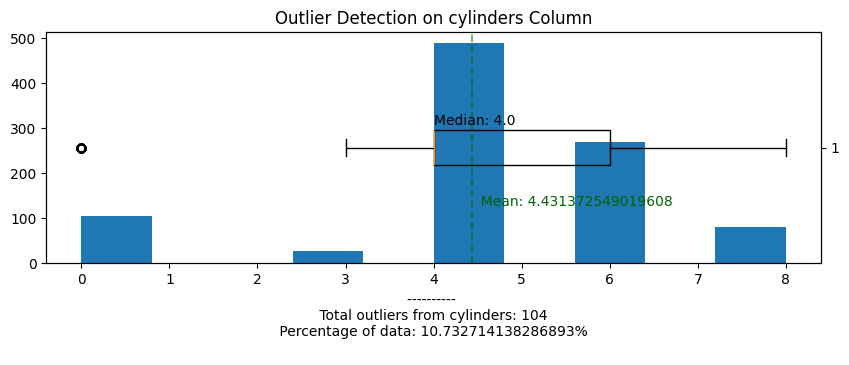

In [160]:

outlier_df = outlier_rows(df, 'cylinders')
print(f"## Outlier counts per vehicle model: \n{outlier_df['model'].value_counts()}")
quantitative_visualizer(df, 'cylinders')

mileage Variable - Outliers

## Outlier counts per vehicle model: 
model
Durango               18
3500                  10
Grand Cherokee 4xe     8
Hornet                 6
Edge                   5
ProMaster 3500         4
CX-90 PHEV             4
Jetta                  4
Tucson Hybrid          4
Grand Cherokee L       3
Sportage               3
Taos                   3
Tucson                 2
Expedition             2
Grand Wagoneer         2
Pacifica               2
Murano                 2
Palisade               2
Transit-350            2
X7                     2
IONIQ 6                2
Wagoneer               1
Wagoneer L             1
Wrangler 4xe           1
XT5                    1
i5                     1
Tundra Hybrid          1
Transit-150            1
Mustang Mach-E         1
Niro                   1
Sprinter 2500          1
Silverado 2500         1
Silverado 1500         1
Seltos                 1
QX50                   1
LYRIQ                  1
Explorer               1
F-350                  1
F-150 

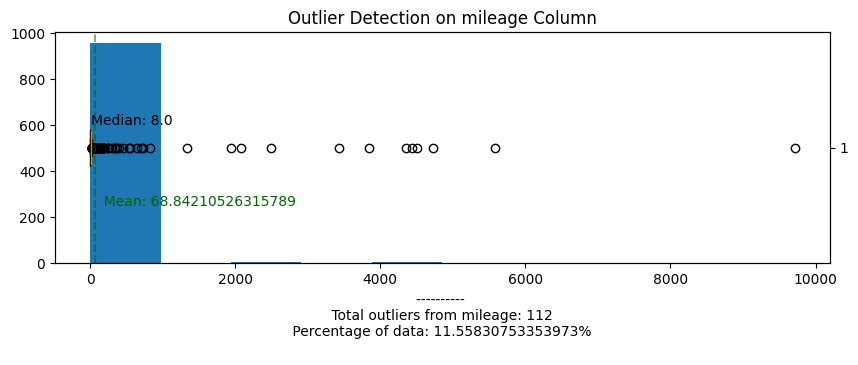

In [161]:
outlier_df = outlier_rows(df, 'mileage')
print(f"## Outlier counts per vehicle model: \n{outlier_df['model'].value_counts()}")
quantitative_visualizer(df, 'mileage')

In [162]:

outlier_rows(df, 'mileage')

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price_log
419,2024 BMW i5 M60,BMW,i5,2024,96895.0,c,0.0,Electric,37.0,1-Speed Automatic,M60,Sedan,4.0,Black Sapphire,Black,All-wheel Drive,11.481383
362,2024 Cadillac XT5 Premium Luxury,Cadillac,XT5,2024,60915.0,24V GDI DOHC,6.0,Gasoline,31.0,9-Speed Automatic,Premium Luxury,SUV,4.0,Silver Metallic,Jet Black,Front-wheel Drive,11.017235
450,2024 BMW X7 M60i,BMW,X7,2024,115445.0,32V GDI DOHC Twin Turbo,8.0,Gasoline,447.0,8-Speed Automatic,M60i,SUV,4.0,Mineral White Metallic,Black,All-wheel Drive,11.656550
843,2024 BMW X7 xDrive40i,BMW,X7,2024,94895.0,24V GDI DOHC Turbo,6.0,Gasoline,1946.0,8-Speed Automatic,xDrive40i,SUV,4.0,Tanzanite Blue II Metallic,Silverstone,All-wheel Drive,11.460526
659,2024 Jeep Wrangler 4xe Rubicon,Jeep,Wrangler 4xe,2024,65295.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,26.0,8-Speed Automatic,Rubicon,SUV,4.0,Hydro Blue Pearlcoat,Black,Four-wheel Drive,11.086671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,2024 RAM 3500 Laramie,RAM,3500,2024,72294.0,24V DDI OHV Turbo Diesel,6.0,Diesel,33.0,Automatic,Laramie,Pickup Truck,4.0,Diamond Black,Black,Four-wheel Drive,11.188496
838,2024 RAM 3500 Big Horn,RAM,3500,2024,67422.0,24V DDI OHV Turbo Diesel,6.0,Diesel,27.0,6-Speed Automatic,Big Horn,Pickup Truck,4.0,Billet Silver Metallic Clearcoat,Black,Four-wheel Drive,11.118727
376,2023 RAM 3500 Tradesman,RAM,3500,2023,63010.0,16V MPFI OHV,8.0,Gasoline,95.0,8-Speed Automatic,Tradesman,Pickup Truck,2.0,Bright White Clearcoat,Black,Four-wheel Drive,11.051049
417,2024 RAM 3500 Tradesman,RAM,3500,2024,67504.0,16V MPFI OHV,8.0,Gasoline,98.0,8-Speed Automatic,Tradesman,Pickup Truck,2.0,Bright White Clearcoat,Black,Four-wheel Drive,11.119942


count     112.000000
mean      538.848214
std      1411.048145
min        25.000000
25%        31.000000
50%        50.000000
75%       190.250000
max      9711.000000
Name: mileage, dtype: float64


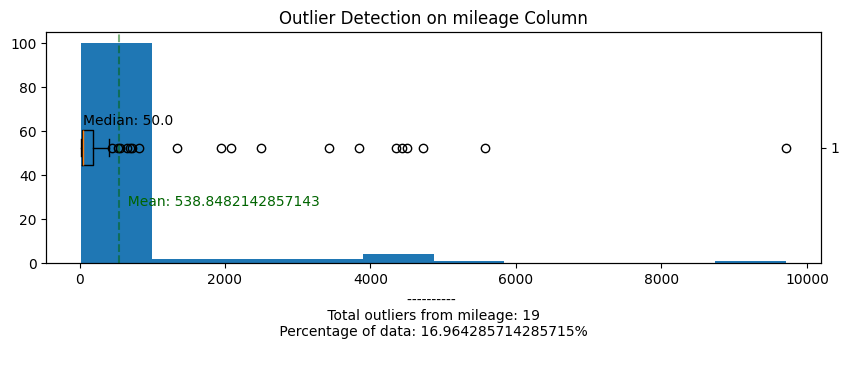

In [163]:
mileage_outliers = outlier_rows(df, 'mileage')
print(mileage_outliers['mileage'].describe())

quantitative_visualizer(mileage_outliers, 'mileage')

In [164]:
mileage_outliers['year'].value_counts()

,count
year,
2024,83
2023,29


## Outlier counts per vehicle model after outlier treatment: 
model
3500                  8
Grand Cherokee 4xe    7
Hornet                7
Jetta                 4
ProMaster 3500        4
CX-90 PHEV            4
Taos                  3
Sportage              3
Tucson Hybrid         3
Grand Cherokee L      3
Palisade              2
Expedition            2
Wagoneer              2
Wrangler 4xe          1
i5                    1
QX50                  1
Silverado 1500        1
Silverado 2500        1
Sprinter 2500         1
Transit-150           1
XT5                   1
Transit-350           1
Transit-250           1
Mustang Mach-E        1
Pacifica              1
Murano                1
F-350                 1
Durango               1
Edge                  1
CR-V Hybrid           1
A3                    1
Name: count, dtype: int64


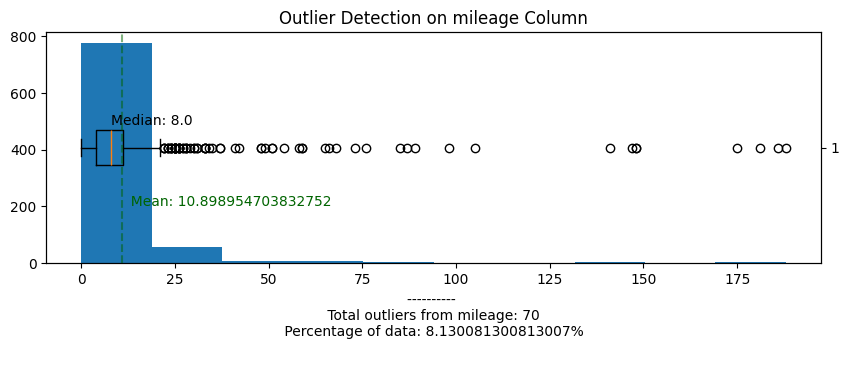

In [165]:
outliers_75 = mileage_outliers[mileage_outliers['mileage'] >= 191]
df.drop(outliers_75.index, axis=0, inplace=True)

df = df[df['year'] == 2024]

outlier_df = outlier_rows(df, 'mileage')
print(f"## Outlier counts per vehicle model after outlier treatment: \n{outlier_df['model'].value_counts()}")
quantitative_visualizer(df, 'mileage')

doors Variable - Outliers

## Outlier counts per vehicle model: 
model
Transit-250       6
Sprinter 2500     6
ProMaster 3500    4
ProMaster 2500    3
Savana 2500       3
Transit-150       2
Transit-350       2
Sierra 2500       2
Sprinter 3500     2
ProMaster 1500    2
3500              2
I-PACE            1
F-350             1
Defender          1
2500              1
Name: count, dtype: int64


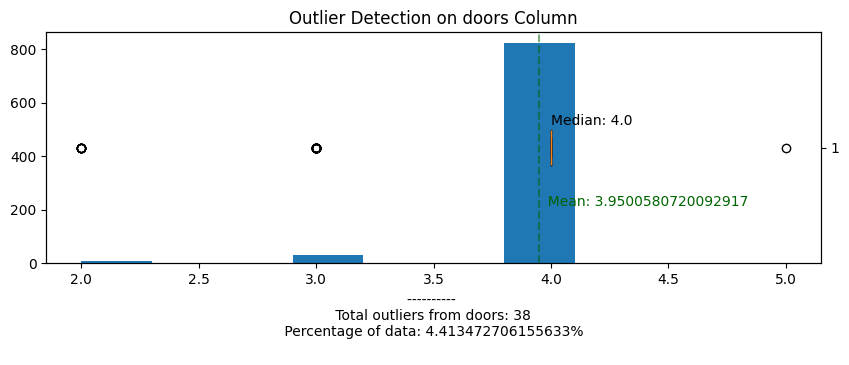

In [166]:
outlier_df = outlier_rows(df, 'doors')
print(f"## Outlier counts per vehicle model: \n{outlier_df['model'].value_counts()}")
quantitative_visualizer(df, 'doors')

In [167]:
df[df['doors'] == 5]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price_log
726,2024 Jaguar I-PACE EV400 R-Dynamic HSE,Jaguar,I-PACE,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,0.0,Electric,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive,11.252249


In [168]:
df[df['doors'] == 3]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price_log
897,2024 Ford Transit-350 Base,Ford,Transit-350,2024,74391.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,85.0,Automatic,Base,Cargo Van,3.0,Oxford White,gray,All-wheel Drive,11.217090
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,Automatic,148 WB Medium Roof Cargo,Cargo Van,3.0,White,Black,Rear-wheel Drive,10.869140
412,2024 Ford Transit-250 Base,Ford,Transit-250,2024,51803.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,1.0,Automatic,Base,Cargo Van,3.0,Oxford White,Dk Palazzo Gry Fron,Rear-wheel Drive,10.855203
472,2024 Ford Transit-250 Base,Ford,Transit-250,2024,52853.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,0.0,Automatic,Base,Cargo Van,3.0,Oxford White,Dk Palazzo Gry Fron,Rear-wheel Drive,10.875270
581,2024 Ford Transit-250 Base,Ford,Transit-250,2024,61248.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,0.0,Automatic,Base,Cargo Van,3.0,Oxford White,Gray,Rear-wheel Drive,11.022686
831,2024 Ford Transit-250 Base,Ford,Transit-250,2024,64025.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,0.0,Automatic,Base,Cargo Van,3.0,Oxford White,Dk Palazzo Gry Clth Front,All-wheel Drive,11.067029
31,2024 Ford Transit-250 148 WB Medium Roof Cargo,Ford,Transit-250,2024,53595.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,10.0,Automatic,148 WB Medium Roof Cargo,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive,10.889211
909,2024 Ford Transit-250 148 WB Medium Roof Cargo,Ford,Transit-250,2024,50486.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,24.0,10-Speed Automatic with Overdrive,148 WB Medium Roof Cargo,Cargo Van,3.0,Oxford White,Dark Palazzo,Rear-wheel Drive,10.829451
115,2024 Ford Transit-150 Base,Ford,Transit-150,2024,55645.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,59.0,10-Speed Automatic,Base,Cargo Van,3.0,Race Red,Ebony,All-wheel Drive,10.926748
877,2024 Ford Transit-150 Base,Ford,Transit-150,2024,52640.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,6.0,10-Speed Automatic,Base,Cargo Van,3.0,Oxford White,Gray,Rear-wheel Drive,10.871232


In [169]:
df[df['doors'] == 2]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price_log
745,2024 GMC Sierra 2500 Pro,GMC,Sierra 2500,2024,47763.0,16V GDI OHV,8.0,Gasoline,0.0,10-Speed Automatic,Pro,Pickup Truck,2.0,Summit White,Jet Black,Rear-wheel Drive,10.774007
955,2024 GMC Sierra 2500 Pro,GMC,Sierra 2500,2024,48268.0,16V GDI OHV,8.0,Gasoline,3.0,10-Speed Automatic,Pro,Pickup Truck,2.0,Summit White,Jet Black,Rear-wheel Drive,10.784524
172,2024 Ford F-350 XL,Ford,F-350,2024,52263.0,"8 variable valve control, regular unleaded, en...",8.0,Gasoline,10.0,10-Speed Automatic,XL,Pickup Truck,2.0,Race Red,Medium Earth Gray,Four-wheel Drive,10.864044
440,2024 Land Rover Defender P400 X-Dynamic SE,Land Rover,Defender,2024,77645.0,24V GDI DOHC Turbo,6.0,Gasoline,9.0,8-Speed Automatic,P400 X-Dynamic SE,SUV,2.0,Gondwana Stone,Ebony,Four-wheel Drive,11.259902
619,2024 RAM 3500 Tradesman,RAM,3500,2024,61330.0,24V DDI OHV Turbo Diesel,6.0,Diesel,6.0,6-Speed Automatic,Tradesman,Pickup Truck,2.0,Flame Red Clearcoat,Black,Four-wheel Drive,11.024024
417,2024 RAM 3500 Tradesman,RAM,3500,2024,67504.0,16V MPFI OHV,8.0,Gasoline,98.0,8-Speed Automatic,Tradesman,Pickup Truck,2.0,Bright White Clearcoat,Black,Four-wheel Drive,11.119942
921,2024 RAM 2500 Tradesman Regular Cab 4x4 8' Box,RAM,2500,2024,53750.0,"4L V-8 VVT variable valve control, regular unl...",8.0,Gasoline,0.0,Automatic,Tradesman Regular Cab 4x4 8&#39; Box,Pickup Truck,2.0,Bright White Clearcoat,Diesel Gray/Black,Four-wheel Drive,10.892099


## Outlier counts per vehicle model: 
model
Transit-250       6
Sprinter 2500     6
ProMaster 3500    4
Savana 2500       3
ProMaster 2500    3
Transit-350       2
Sierra 2500       2
Sprinter 3500     2
Transit-150       2
ProMaster 1500    2
3500              2
F-350             1
Defender          1
2500              1
Name: count, dtype: int64


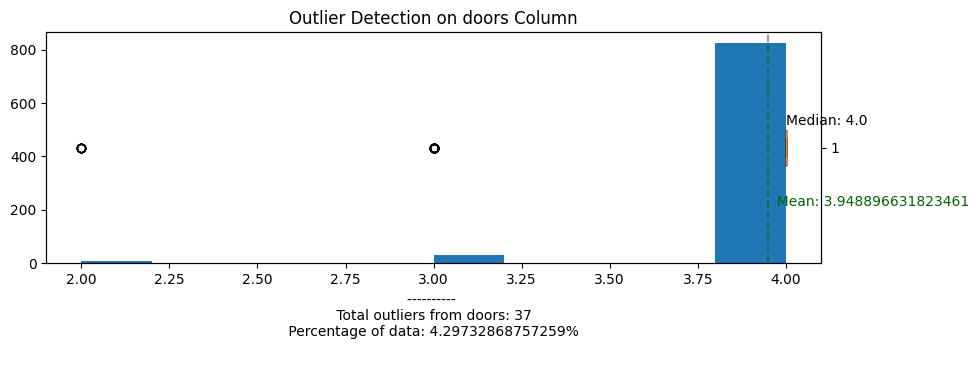

In [170]:
df.loc[726, 'doors'] = 4

outlier_df = outlier_rows(df, 'doors')
print(f"## Outlier counts per vehicle model: \n{outlier_df['model'].value_counts()}")
quantitative_visualizer(df, 'doors')

In [171]:
df.to_csv('cleaned_dataset.csv', index=False)

In [172]:
df.sample(5)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price_log
428,2024 Dodge Hornet GT,Dodge,Hornet,2024,34637.0,16V GDI DOHC Turbo,4.0,Gasoline,54.0,9-Speed Automatic,GT,SUV,4.0,Gray,Black,All-wheel Drive,10.452678
569,2024 Jeep Compass Limited,Jeep,Compass,2024,38736.0,DOHC,4.0,Gasoline,12.0,8-Speed Automatic,Limited,SUV,4.0,Laser Blue Pearlcoat,Black,Four-wheel Drive,10.564525
855,2024 Cadillac XT5 Luxury,Cadillac,XT5,2024,47290.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,3.0,Automatic,Luxury,SUV,4.0,Argent Silver Metallic,Jet Black,All-wheel Drive,10.764054
324,2024 Ford Edge ST-Line,Ford,Edge,2024,42715.0,16V GDI DOHC Turbo,4.0,Gasoline,2.0,8-Speed Automatic,ST-Line,SUV,4.0,Black,Ebony,All-wheel Drive,10.662305
528,2024 Ford Bronco Sport Big Bend,Ford,Bronco Sport,2024,31390.0,"t 1.5L I-3 port/direct injection, DOHC, Ti-VCT...",3.0,Gasoline,13.0,Automatic,Big Bend,SUV,4.0,Carbonized Gray Metallic,Ebony,Four-wheel Drive,10.354245


In [173]:
df = df.drop('price_log',axis = 1)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861 entries, 293 to 833
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            861 non-null    object 
 1   make            861 non-null    object 
 2   model           861 non-null    object 
 3   year            861 non-null    int64  
 4   price           861 non-null    float64
 5   engine          861 non-null    object 
 6   cylinders       861 non-null    float64
 7   fuel            861 non-null    object 
 8   mileage         861 non-null    float64
 9   transmission    861 non-null    object 
 10  trim            861 non-null    object 
 11  body            861 non-null    object 
 12  doors           861 non-null    float64
 13  exterior_color  861 non-null    object 
 14  interior_color  861 non-null    object 
 15  drivetrain      861 non-null    object 
dtypes: float64(4), int64(1), object(11)
memory usage: 146.6+ KB


In [175]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['name', 'make', 'model', 'engine', 'fuel', 'transmission',
                    'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']
numerical_cols = ['year', 'price', 'cylinders', 'mileage', 'doors']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

df = preprocessor.fit_transform(df)

ohe = preprocessor.named_transformers_['cat']
ohe_columns = ohe.get_feature_names_out(categorical_cols)

df = pd.DataFrame(df, columns=list(ohe_columns) + numerical_cols)


In [176]:
df.head(5)

,name_2024 Acura MDX Advance,name_2024 Acura MDX Base,name_2024 Acura MDX Technology,name_2024 Acura ZDX A-SPEC,name_2024 Audi A3 Premium,name_2024 Audi A5 Sportback S line Premium,name_2024 Audi A5 Sportback S line Premium Plus,name_2024 Audi Q5 e 55 Premium Plus,name_2024 Audi Q5 e 55 Prestige,name_2024 Audi Q5 e Premium 55 TFSI e S line quattro S tronic,...,interior_color_gray,drivetrain_All-wheel Drive,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive,year,price,cylinders,mileage,doors
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2024.0,110445.0,0.0,5.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2024.0,195895.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2024.0,91825.0,0.0,7.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2024.0,96895.0,0.0,37.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2024.0,93335.0,0.0,3.0,4.0


In [177]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']

In [178]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
dbr = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
dbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [180]:
y_pred = dbr.predict(X_test)

In [181]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8244034816696495

In [182]:
X_train

,name_2024 Acura MDX Advance,name_2024 Acura MDX Base,name_2024 Acura MDX Technology,name_2024 Acura ZDX A-SPEC,name_2024 Audi A3 Premium,name_2024 Audi A5 Sportback S line Premium,name_2024 Audi A5 Sportback S line Premium Plus,name_2024 Audi Q5 e 55 Premium Plus,name_2024 Audi Q5 e 55 Prestige,name_2024 Audi Q5 e Premium 55 TFSI e S line quattro S tronic,...,interior_color_Wicker Beige/Global Black,interior_color_gray,drivetrain_All-wheel Drive,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive,year,cylinders,mileage,doors
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2024.0,4.0,1.0,4.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2024.0,4.0,4.0,4.0
319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2024.0,6.0,26.0,4.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2024.0,4.0,7.0,4.0
368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2024.0,0.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2024.0,6.0,59.0,4.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2024.0,4.0,5.0,4.0
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2024.0,4.0,11.0,4.0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2024.0,0.0,7.0,4.0


In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [184]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.8661868719854465

In [185]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [186]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.8217056756526618


In [187]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [188]:
y_pred = dt.predict(X_test)
r2_score(y_test,y_pred)

0.7438189569065896

In [189]:
df.shape

(861, 1136)

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print(" Best Parameters:", grid_search.best_params_)

y_pred = best_rf.predict(X_test)
print(" Test R2 Score:", r2_score(y_test, y_pred))




Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
 Test R2 Score: 0.8076590349613226


In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'LinearRegression': LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'R2_Score': r2,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results).sort_values(by='R2_Score', ascending=False)


/tmp/ipython-input-192-3116518298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2_Score', data=results_df, palette='coolwarm')


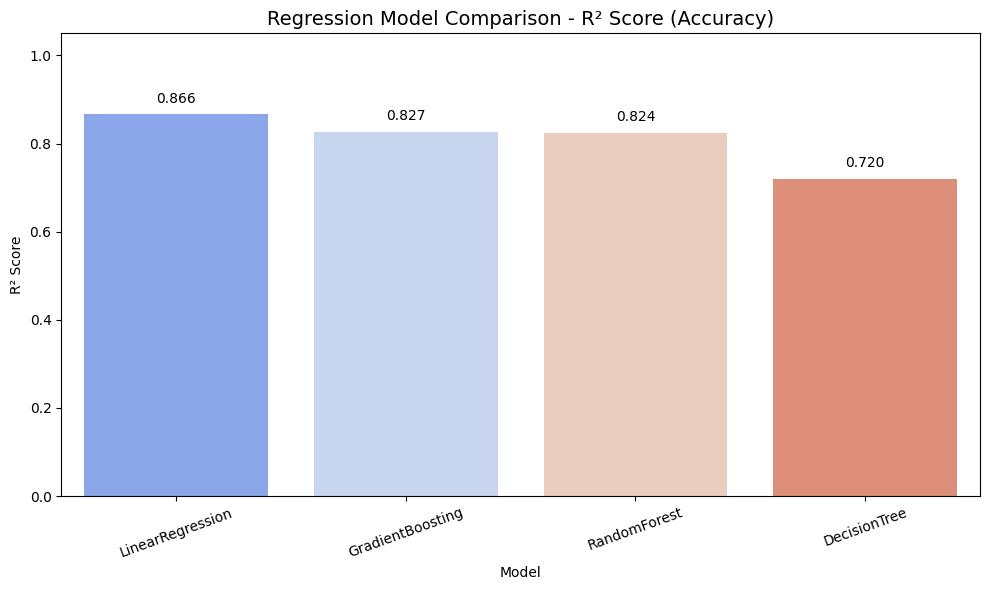

In [192]:
results_df = pd.DataFrame(results).sort_values(by='R2_Score', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2_Score', data=results_df, palette='coolwarm')

plt.title('Regression Model Comparison - R² Score (Accuracy)', fontsize=14)
plt.ylabel('R² Score')
plt.ylim(0, 1.05)

for i in range(len(results_df)):
    r2_val = results_df.loc[i, 'R2_Score']
    plt.text(i, r2_val + 0.02, f"{r2_val:.3f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [193]:
rf_oob = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,
    random_state=42,
    bootstrap=True
)

rf_oob.fit(X_train, y_train)

print(f"OOB R² Score: {rf_oob.oob_score_:.4f}")


OOB R² Score: 0.8035


In [194]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print("Linear Regression R² scores:", lr_scores)
print("Mean R² (Linear):", np.mean(lr_scores))


rf = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Random Forest R² scores:", rf_scores)
print("Mean R² (Random Forest):", np.mean(rf_scores))


Linear Regression R² scores: [0.84183945 0.8180294  0.76214708 0.88484031 0.73255418]
Mean R² (Linear): 0.8078820845296356
Random Forest R² scores: [0.80860115 0.77851125 0.79662109 0.91164879 0.71111897]
Mean R² (Random Forest): 0.8013002510243794
